In [ ]:
import os
import sys
sys.path.append('..')
import cv2
import numpy as np
import matplotlib.pyplot as plt

from testing.test_utils.model import create_model
from testing.test_utils.utils_vis import show_mask, show_neg_points, show_pos_points
from testing.test_utils.utils import p2sam_medical


class Args:
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)

In [2]:
# create model
sam_type, sam_ckpt = 'vit_l', 'pretrained_weights/nsclc_full_large/checkpoint.pth'
sam = create_model(sam_type, sam_ckpt, encoder_type='timm', lora=False, r=1, enable_lora=[True, True, True])
sam = sam.to('cuda')

validation: 0.6873589736550368 at 34 epoch.


/home/chuizhao/.conda/envs/p2sam/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


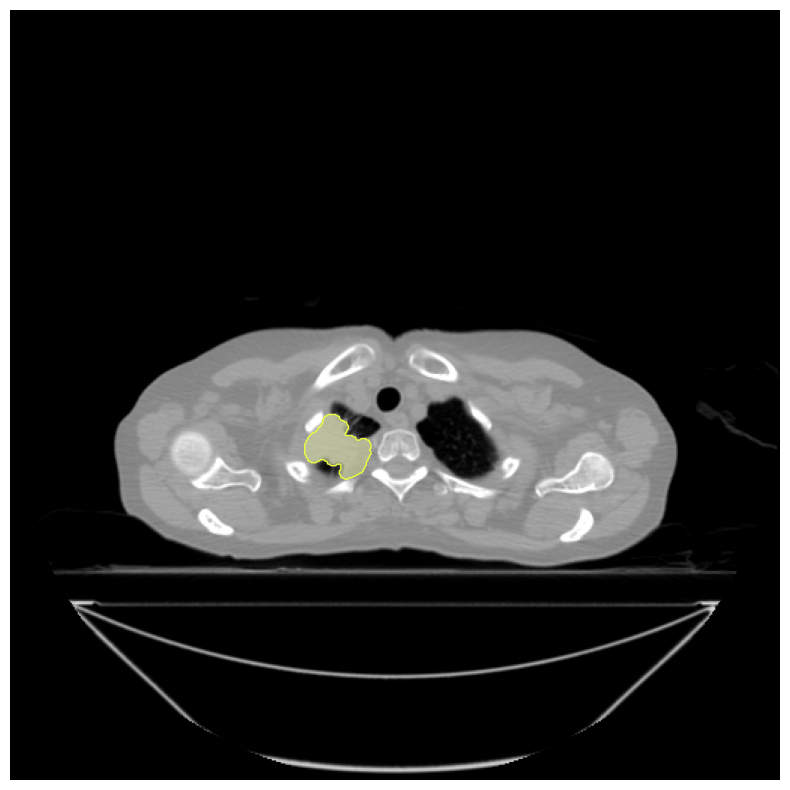

In [3]:
# load image
test_image = cv2.imread('images/test_image.png')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
if os.path.exists('images/test_mask.png'):
    test_mask = cv2.imread('images/test_mask.png', cv2.IMREAD_GRAYSCALE)       
    test_mask = test_mask - (test_mask.max()+test_mask.min()) / 2.0
    test_mask = (test_mask > 0.0).astype(np.float)
else:
    test_mask = None
plt.figure(figsize=(10, 10))
plt.imshow(test_image)
if test_mask is not None:
    show_mask(test_mask, plt.gca(), -1, linewidth=1) 
plt.axis('off')
plt.show()

In [4]:
# forward
args = Args(min_num_pos=3, max_num_pos=3, min_num_neg=50, max_num_neg=50, reg_patch_weight=False, medsam=False)
sam.eval()
pred_mask, point_coords, point_labels, _, _ = p2sam_medical(args, sam, ref_image_path='images/ref_image.png', ref_mask_path='images/ref_mask.png', test_image_path='images/test_image.png', test_mask_path=None, output_path='images/', slice_name='p2sam_result')

../testing/test_utils/utils.py:23: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  topk_x = (topk_xy // h).unsqueeze(0)
../testing/test_utils/utils.py:31: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  last_x = (last_xy // h).unsqueeze(0)
../testing/test_utils/utils.py:23: UserWarning: __floordiv__ is deprecated, and its behavior will ch

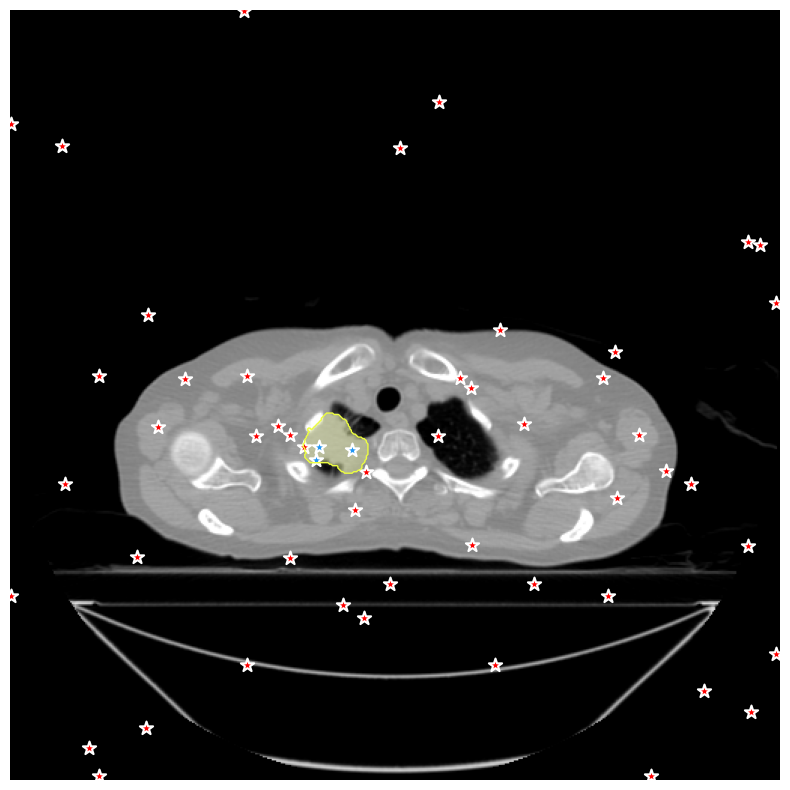

In [5]:
# plot prediction
plt.figure(figsize=(10, 10))
plt.imshow(test_image)
show_mask(pred_mask, plt.gca(), -1, linewidth=1) 
show_pos_points(point_coords, point_labels, plt.gca(), -1, None, marker_size=100, linewidth=1.5)
show_neg_points(point_coords, point_labels, plt.gca(), 'red', marker_size=100, linewidth=1.5)
plt.axis('off')
plt.show()